## Numerical Simulation Laboratory (NSL)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

### Exercise 1

In the seventh lesson we simulated a system of $N$ particles (classic Lennard-Jones fluid) in a box with PBC in NVT ensemble, using the Metropolis algorithm.
With the provided Monte Carlo code I printed instantaneous values (of  $M=10^5$ MC steps) of potential energy per particle, $U/N$, and pressure, $P$, in the following thermodynamic conditions corresponding to the 3 phases of the system:

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

The first aim of the lesson is to write a python script to estimate the Monte Carlo correlation time for the quantities $U/N$ and $P$.

In [2]:
def autocorrelation(series, lag):
    n = len(series)
    mean = 0.
    for x in series:
        mean += x
    mean /= n
    c = 0.
    for i in range(n - lag):
        c += (series[i] - mean)*(series[i + lag] - mean)
    autocovariance = 0.
    for i in range(n):
        autocovariance += (series[i] - mean)*(series[i] - mean)

    return (c / n)/(autocovariance/n)

def exp_fit(t, t0):
    return np.exp(-t / t0)

Correlation lenght of pressure in solid phase:  9.790507550648318
Correlation lenght of $U/N$ in solid phase:  10.01008616211933
Correlation lenght of pressure in liquid phase:  14.731948346349533
Correlation lenght of $U/N$ in liquid phase:  9.40149923465199
Correlation lenght of pressure in gaseous phase:  0.8737200424840337
Correlation lenght of $U/N$ in gaseous phase:  2.8712717680326545


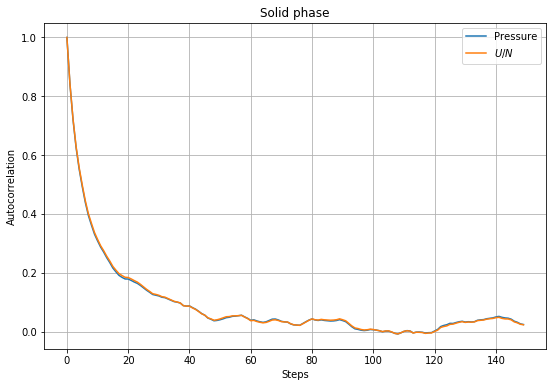

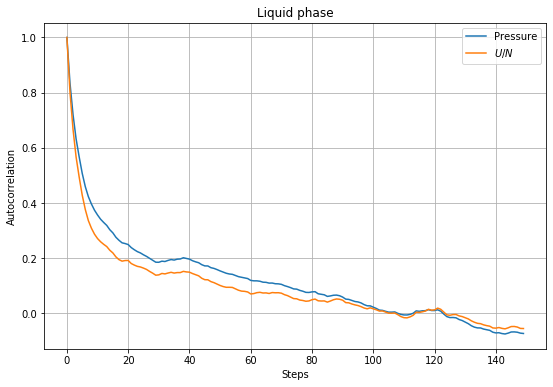

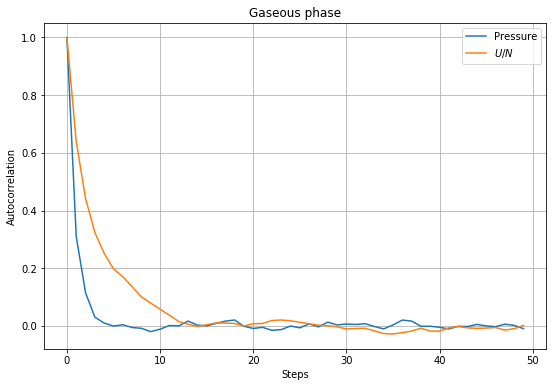

In [3]:
x_pres_sol, y_pres_sol = np.loadtxt("MonteCarlo_NVT/Exercise_01/solid/output.pres.0", unpack = True, usecols = (0,1))
x_epot_sol, y_epot_sol = np.loadtxt("MonteCarlo_NVT/Exercise_01/solid/output.epot.0", unpack = True, usecols = (0,1))

x_pres_liq, y_pres_liq = np.loadtxt("MonteCarlo_NVT/Exercise_01/liquid/output.pres.0", unpack = True, usecols = (0,1))
x_epot_liq, y_epot_liq = np.loadtxt("MonteCarlo_NVT/Exercise_01/liquid/output.epot.0", unpack = True, usecols = (0,1))

x_pres_gas, y_pres_gas = np.loadtxt("MonteCarlo_NVT/Exercise_01/gas/output.pres.0", unpack = True, usecols = (0,1))
x_epot_gas, y_epot_gas = np.loadtxt("MonteCarlo_NVT/Exercise_01/gas/output.epot.0", unpack = True, usecols = (0,1))

plt.figure(1, figsize = (9, 6))

corr_pres_sol = [autocorrelation(y_pres_sol, t) for t in np.arange(150)]
corr_epot_sol = [autocorrelation(y_epot_sol, t) for t in np.arange(150)]

corr_lenght_pres_sol, var_pres_sol = optimize.curve_fit(exp_fit, np.arange(150), corr_pres_sol)
corr_lenght_epot_sol, var_epot_sol = optimize.curve_fit(exp_fit, np.arange(150), corr_epot_sol)

print("Correlation lenght of pressure in solid phase: ", corr_lenght_pres_sol[0])
print("Correlation lenght of $U/N$ in solid phase: ", corr_lenght_epot_sol[0])

plt.plot(corr_pres_sol, label="Pressure")
plt.plot(corr_epot_sol, label="$U/N$")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Solid phase')
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (9, 6))

corr_pres_liq = [autocorrelation(y_pres_liq, t) for t in np.arange(150)]
corr_epot_liq = [autocorrelation(y_epot_liq, t) for t in np.arange(150)]

corr_lenght_pres_liq, var_pres_liq = optimize.curve_fit(exp_fit, np.arange(150), corr_pres_liq)
corr_lenght_epot_liq, var_epot_liq = optimize.curve_fit(exp_fit, np.arange(150), corr_epot_liq)

print("Correlation lenght of pressure in liquid phase: ", corr_lenght_pres_liq[0])
print("Correlation lenght of $U/N$ in liquid phase: ", corr_lenght_epot_liq[0])

plt.plot(corr_pres_liq, label="Pressure")
plt.plot(corr_epot_liq, label="$U/N$")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Liquid phase')
plt.grid(True)
plt.legend()

plt.figure(3, figsize = (9, 6))

corr_pres_gas = [autocorrelation(y_pres_gas, t) for t in np.arange(50)]
corr_epot_gas = [autocorrelation(y_epot_gas, t) for t in np.arange(50)]

corr_lenght_pres_gas, var_pres_gas = optimize.curve_fit(exp_fit, np.arange(50), corr_pres_gas)
corr_lenght_epot_gas, var_epot_gas = optimize.curve_fit(exp_fit, np.arange(50), corr_epot_gas)

print("Correlation lenght of pressure in gaseous phase: ", corr_lenght_pres_gas[0])
print("Correlation lenght of $U/N$ in gaseous phase: ", corr_lenght_epot_gas[0])

plt.plot(corr_pres_gas, label="Pressure")
plt.plot(corr_epot_gas, label="$U/N$")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Gaseous phase')
plt.grid(True)
plt.legend()

Liquid phase doesn't seem to be very well approximated by an exponential function so the obtained values tend to understimate the real Monte Carlo correlation time.

Looking at the graphs and the fitted esponential values I think that resonable choices for the block size could be $20$ steps-per-block for the gaseous phase and $50$ steps-per-block for solid and liquid phase.

I than used the same data to study, with another python script, the estimation of the statistical uncertainties for the above quantitities for different size of the blocks in the data blocking technique.
I produced pictures of these statistical uncertainties as a function of the block size $L=M/N$ in the range $\left[10;5\times 10^3\right]$, being $N$ the number of blocks.
Pictures of these statistical uncertainties as a function of $L$ are shown below.

In [4]:
def get_error(x, blk_len):
    mc_step=len(x)
    n_blks=int(mc_step/blk_len)
    glob_avg=0
    glob_avg2=0

    for i in range(n_blks):
        blk_avg=0
        for j in range(blk_len):
            blk_avg += x[j+blk_len*i]
        blk_avg /= blk_len

        glob_avg += blk_avg
        glob_avg2 += (blk_avg*blk_avg)

    return np.sqrt((glob_avg2/n_blks-(glob_avg/n_blks)**2)/n_blks)

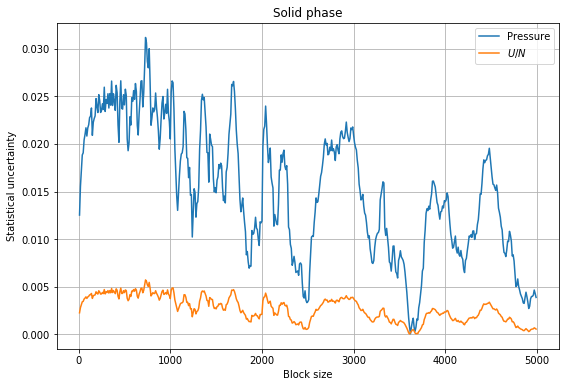

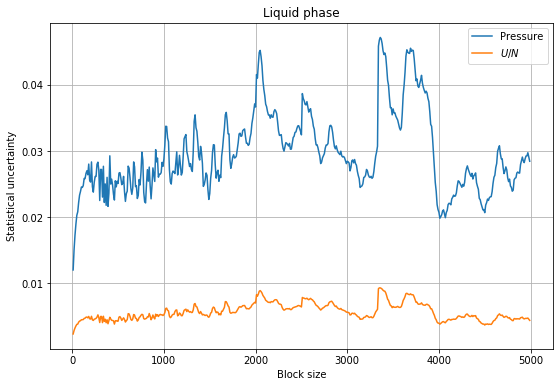

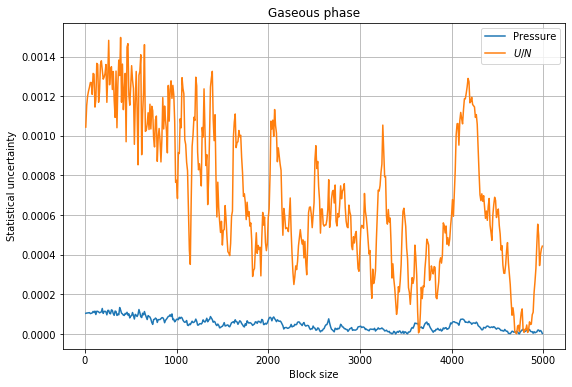

In [5]:
plt.figure(1, figsize = (9, 6))

vec_pres_sol=[]
vec_epot_sol=[]

for blk_len in range(10, 5000, 10):
    err_pres_sol = get_error(y_pres_sol, blk_len)
    err_epot_sol = get_error(y_epot_sol, blk_len)

    vec_pres_sol.append(err_pres_sol)
    vec_epot_sol.append(err_epot_sol)

plt.plot(range(10, 5000, 10), vec_pres_sol, label="Pressure")
plt.plot(range(10, 5000, 10), vec_epot_sol, label="$U/N$")
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.title('Solid phase')
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (9, 6))

vec_pres_liq=[]
vec_epot_liq=[]

for blk_len in range(10, 5000, 10):
    err_pres_liq = get_error(y_pres_liq, blk_len)
    err_epot_liq = get_error(y_epot_liq, blk_len)

    vec_pres_liq.append(err_pres_liq)
    vec_epot_liq.append(err_epot_liq)

plt.plot(range(10, 5000, 10), vec_pres_liq, label="Pressure")
plt.plot(range(10, 5000, 10), vec_epot_liq, label="$U/N$")
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.title('Liquid phase')
plt.grid(True)
plt.legend()

plt.figure(3, figsize = (9, 6))

vec_pres_gas=[]
vec_epot_gas=[]

for blk_len in range(10, 5000, 10):
    err_pres_gas = get_error(y_pres_gas, blk_len)
    err_epot_gas = get_error(y_epot_gas, blk_len)

    vec_pres_gas.append(err_pres_gas)
    vec_epot_gas.append(err_epot_gas)

plt.plot(range(10, 5000, 10), vec_pres_gas, label="Pressure")
plt.plot(range(10, 5000, 10), vec_epot_gas, label="$U/N$")
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.title('Gaseous phase')
plt.grid(True)
plt.legend()

Looking at the produced pictures we can observe that statistical uncertainties shows a rapid increase in the very first part of the graph, sign that before reaching the optimal block size we tend to understimate the statistical error.
Increasing the block size the uncertainties don't seem to show a regualar trend.
In general they seem to slowly decrease showing very large oscillations. 

### Exercise 4

After having added the calculation of the radial distribution function $g(r)$ inside the Monte Carlo code, I performed simulations of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the solid, liquid and gas phase.

Below are shown the pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units.

The radial distribution functions obtained here are compared with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.

In [6]:
# SI conversion

k_b=1.380649e-23
a_m_u=1.66054e-27

sigma_ar=0.34e-9
epsilon_ar=120.*k_b
m_ar=39.948*a_m_u

sigma_kr=0.364e-9
epsilon_kr=164*k_b
m_kr=83.798*a_m_u

delta=0.0005

time_step_ar=delta*np.sqrt(m_ar*sigma_ar*sigma_ar/epsilon_ar)
time_step_kr=delta*np.sqrt(m_kr*sigma_kr*sigma_kr/epsilon_kr)

#### Solid

Parameters for the simulation of the solid phase are:
- $108$ particles
- $1000$ steps of equilibration
- $200$ blocks
- $50$ steps per block
- $0.12$ of MC step (chosen in order to obtain 50% of acceptance)
- $\rho^\star = 1.1$
- $T^\star = 0.8$
- $r_c = 2.2$

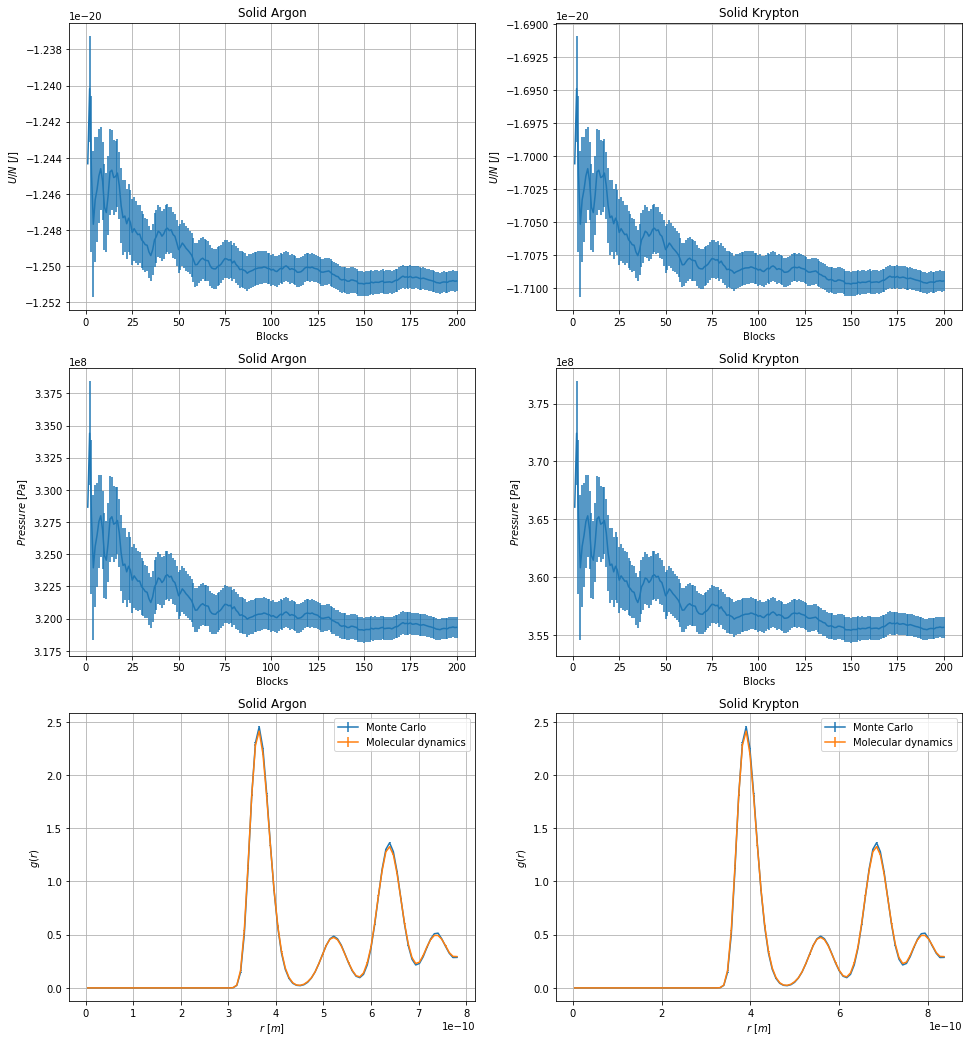

In [7]:
x_s_epot, y_s_epot, yerr_s_epot = np.loadtxt("MonteCarlo_NVT/Exercise_04/solid/output.epot.0", unpack = True, usecols = (0,2,3))
x_s_pres, y_s_pres, yerr_s_pres = np.loadtxt("MonteCarlo_NVT/Exercise_04/solid/output.pres.0", unpack = True, usecols = (0,2,3))
x_s_gave_mc, y_s_gave_mc, yerr_s_gave_mc = np.loadtxt("MonteCarlo_NVT/Exercise_04/solid/output.gave.0", unpack = True)
x_s_gave_md, y_s_gave_md, yerr_s_gave_md = np.loadtxt("MonteCarlo_NVT/Exercise_04/MD_g_ave/ave_g_solid.out", unpack = True)

y_s_epot_ar=y_s_epot*epsilon_ar
y_s_pres_ar=y_s_pres*epsilon_ar/(sigma_ar**3)

yerr_s_epot_ar=yerr_s_epot*epsilon_ar
yerr_s_pres_ar=yerr_s_pres*epsilon_ar/(sigma_ar**3)

y_s_epot_kr=y_s_epot*epsilon_kr
y_s_pres_kr=y_s_pres*epsilon_kr/(sigma_kr**3)

yerr_s_epot_kr=yerr_s_epot*epsilon_kr
yerr_s_pres_kr=yerr_s_pres*epsilon_kr/(sigma_kr**3)

x_s_gave_mc_ar=x_s_gave_mc*sigma_ar
x_s_gave_md_ar=x_s_gave_md*sigma_ar

x_s_gave_mc_kr=x_s_gave_mc*sigma_kr
x_s_gave_md_kr=x_s_gave_md*sigma_kr

plt.figure(figsize=(2*8,3*6))

plt.subplot(3, 2, 1)

plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_s_epot, y_s_epot_ar, yerr_s_epot_ar)
plt.grid(True)

plt.subplot(3, 2, 3)

plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_s_pres, y_s_pres_ar, yerr_s_pres_ar)
plt.grid(True)

plt.subplot(3, 2, 5)

plt.title("Solid Argon")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_s_gave_mc_ar, y_s_gave_mc, yerr_s_gave_mc, label = "Monte Carlo")
plt.errorbar(x_s_gave_md_ar, y_s_gave_md, yerr_s_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

plt.subplot(3, 2, 2)

plt.title("Solid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_s_epot, y_s_epot_kr, yerr_s_epot_kr)
plt.grid(True)

plt.subplot(3, 2, 4)

plt.title("Solid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_s_pres, y_s_pres_kr, yerr_s_pres_kr)
plt.grid(True)

plt.subplot(3, 2, 6)

plt.title("Solid Krypton")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_s_gave_mc_kr, y_s_gave_mc, yerr_s_gave_mc, label = "Monte Carlo")
plt.errorbar(x_s_gave_md_kr, y_s_gave_md, yerr_s_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

#### Liquid

For the the simulation of the liquid phase I kept the same parameters chosen for the solid simulation except for the following:

- $0.2$ of MC step
- $\rho^\star = 0.8$
- $T^\star = 1.1$
- $r_c = 2.5$

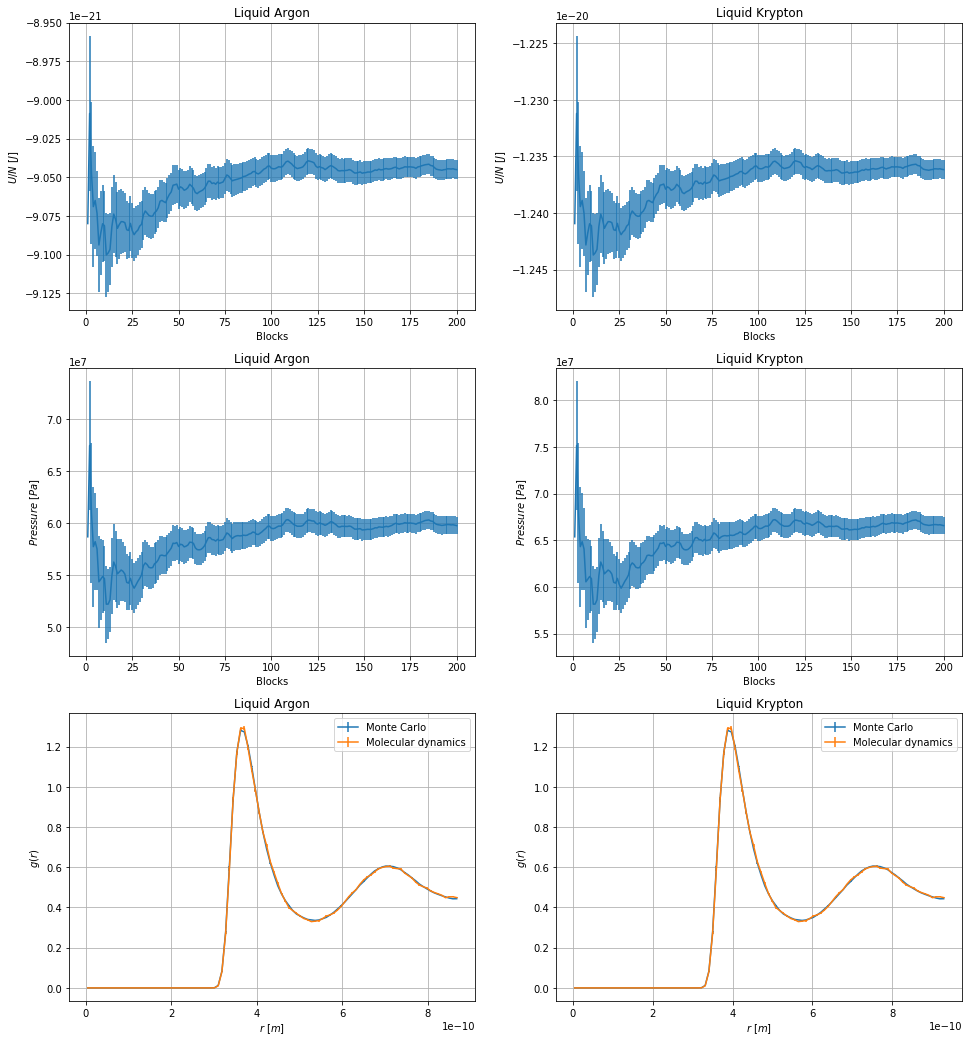

In [8]:
x_l_epot, y_l_epot, yerr_l_epot = np.loadtxt("MonteCarlo_NVT/Exercise_04/liquid/output.epot.0", unpack = True, usecols = (0,2,3))
x_l_pres, y_l_pres, yerr_l_pres = np.loadtxt("MonteCarlo_NVT/Exercise_04/liquid/output.pres.0", unpack = True, usecols = (0,2,3))
x_l_gave_mc, y_l_gave_mc, yerr_l_gave_mc = np.loadtxt("MonteCarlo_NVT/Exercise_04/liquid/output.gave.0", unpack = True)
x_l_gave_md, y_l_gave_md, yerr_l_gave_md = np.loadtxt("MonteCarlo_NVT/Exercise_04/MD_g_ave/ave_g_liquid.out", unpack = True)

y_l_epot_ar=y_l_epot*epsilon_ar
y_l_pres_ar=y_l_pres*epsilon_ar/(sigma_ar**3)

yerr_l_epot_ar=yerr_l_epot*epsilon_ar
yerr_l_pres_ar=yerr_l_pres*epsilon_ar/(sigma_ar**3)

y_l_epot_kr=y_l_epot*epsilon_kr
y_l_pres_kr=y_l_pres*epsilon_kr/(sigma_kr**3)

yerr_l_epot_kr=yerr_l_epot*epsilon_kr
yerr_l_pres_kr=yerr_l_pres*epsilon_kr/(sigma_kr**3)

x_l_gave_mc_ar=x_l_gave_mc*sigma_ar
x_l_gave_md_ar=x_l_gave_md*sigma_ar

x_l_gave_mc_kr=x_l_gave_mc*sigma_kr
x_l_gave_md_kr=x_l_gave_md*sigma_kr

plt.figure(figsize=(2*8,3*6))

plt.subplot(3, 2, 1)

plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_l_epot, y_l_epot_ar, yerr_l_epot_ar)
plt.grid(True)

plt.subplot(3, 2, 3)

plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_l_pres, y_l_pres_ar, yerr_l_pres_ar)
plt.grid(True)

plt.subplot(3, 2, 5)

plt.title("Liquid Argon")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_l_gave_mc_ar, y_l_gave_mc, yerr_l_gave_mc, label = "Monte Carlo")
plt.errorbar(x_l_gave_md_ar, y_l_gave_md, yerr_l_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

plt.subplot(3, 2, 2)

plt.title("Liquid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_l_epot, y_l_epot_kr, yerr_l_epot_kr)
plt.grid(True)

plt.subplot(3, 2, 4)

plt.title("Liquid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_l_pres, y_l_pres_kr, yerr_l_pres_kr)
plt.grid(True)

plt.subplot(3, 2, 6)

plt.title("Liquid Krypton")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_l_gave_mc_kr, y_l_gave_mc, yerr_l_gave_mc, label = "Monte Carlo")
plt.errorbar(x_l_gave_md_kr, y_l_gave_md, yerr_l_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

#### Gas

As I previously mentioned I chose to use $20$ steps per block for the simulation of the gaseous phase.
Modified parameters are:

- $20$ steps per block
- $5.0$ of MC step
- $\rho^\star = 0.05$
- $T^\star = 1.2$
- $r_c = 5.0$

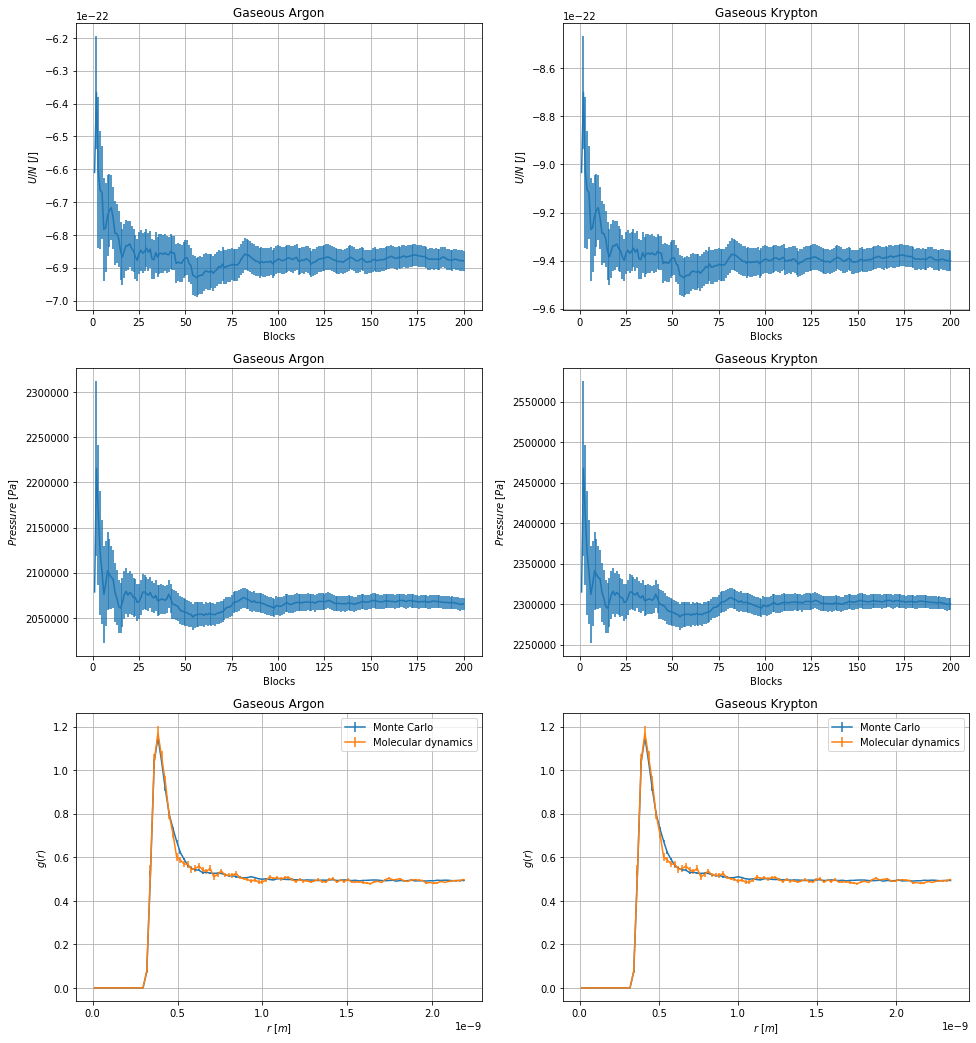

In [12]:
x_g_epot, y_g_epot, yerr_g_epot = np.loadtxt("MonteCarlo_NVT/Exercise_04/gas/output.epot.0", unpack = True, usecols = (0,2,3))
x_g_pres, y_g_pres, yerr_g_pres = np.loadtxt("MonteCarlo_NVT/Exercise_04/gas/output.pres.0", unpack = True, usecols = (0,2,3))
x_g_gave_mc, y_g_gave_mc, yerr_g_gave_mc = np.loadtxt("MonteCarlo_NVT/Exercise_04/gas/output.gave.0", unpack = True)
x_g_gave_md, y_g_gave_md, yerr_g_gave_md = np.loadtxt("MonteCarlo_NVT/Exercise_04/MD_g_ave/ave_g_gas.out", unpack = True)

y_g_epot_ar=y_g_epot*epsilon_ar
y_g_pres_ar=y_g_pres*epsilon_ar/(sigma_ar**3)

yerr_g_epot_ar=yerr_g_epot*epsilon_ar
yerr_g_pres_ar=yerr_g_pres*epsilon_ar/(sigma_ar**3)

y_g_epot_kr=y_g_epot*epsilon_kr
y_g_pres_kr=y_g_pres*epsilon_kr/(sigma_kr**3)

yerr_g_epot_kr=yerr_g_epot*epsilon_kr
yerr_g_pres_kr=yerr_g_pres*epsilon_kr/(sigma_kr**3)

x_g_gave_mc_ar=x_g_gave_mc*sigma_ar
x_g_gave_md_ar=x_g_gave_md*sigma_ar

x_g_gave_mc_kr=x_g_gave_mc*sigma_kr
x_g_gave_md_kr=x_g_gave_md*sigma_kr

plt.figure(figsize=(2*8,3*6))

plt.subplot(3, 2, 1)

plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_g_epot, y_g_epot_ar, yerr_g_epot_ar)
plt.grid(True)

plt.subplot(3, 2, 3)

plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_g_pres, y_g_pres_ar, yerr_g_pres_ar)
plt.grid(True)

plt.subplot(3, 2, 5)

plt.title("Gaseous Argon")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_g_gave_mc_ar, y_g_gave_mc, yerr_g_gave_mc, label = "Monte Carlo")
plt.errorbar(x_g_gave_md_ar, y_g_gave_md, yerr_g_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

plt.subplot(3, 2, 2)

plt.title("Gaseous Krypton")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_g_epot, y_g_epot_kr, yerr_g_epot_kr)
plt.grid(True)

plt.subplot(3, 2, 4)

plt.title("Gaseous Krypton")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_g_pres, y_g_pres_kr, yerr_g_pres_kr)
plt.grid(True)

plt.subplot(3, 2, 6)

plt.title("Gaseous Krypton")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_g_gave_mc_kr, y_g_gave_mc, yerr_g_gave_mc, label = "Monte Carlo")
plt.errorbar(x_g_gave_md_kr, y_g_gave_md, yerr_g_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

Results of $U/N$ and pressure $P$ computed here are compatible with those obtained with MD simulations.
The comparison of radial distribution functions $g(r)$ shows a good matching between the results of the two different sampling methods.